In [1]:
import numpy as np
import pandas as pd


In [2]:
import pandas as pd

#list of possible encodings in our data sets
encodings=['utf-8','latin1','cp1252','ISO-8859-1']

file_path='/content/spam(1).csv' #path of our csp file name

#read the csv file

for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"File succesfully read with enc:{encoding}")
        break # stop the loop if succesfull
    except UnicodeDecodeError:
        print(f"failed to read with encoding:{encoding}")
        continue # try next encodng
if 'df' in locals():
    print("csv filer has been successfully loaded")
else:
    print("all the attempts failed,unable to read")



failed to read with encoding:utf-8
File succesfully read with enc:latin1
csv filer has been successfully loaded


In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
494,ham,Are you free now?can i call now?,NaN,NaN,NaN
4470,ham,Wa... U so efficient... Gee... Thanx...,NaN,NaN,NaN
201,ham,Hello darlin ive finished college now so txt m...,NaN,NaN,NaN
298,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
1526,ham,"Wow ... I love you sooo much, you know ? I can...",NaN,NaN,NaN
1775,ham,Did u see what I posted on your Facebook?,NaN,NaN,NaN
690,ham,Was the farm open?,NaN,NaN,NaN
3742,ham,"Nah, Wednesday. When should I bring the mini c...",NaN,NaN,NaN
687,ham,"Dear,Me at cherthala.in case u r coming cochin...",NaN,NaN,NaN
616,ham,He like not v shock leh. Cos telling shuhui is...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(10)

,v1,v2
3663,ham,Huh? 6 also cannot? Then only how many mistakes?
3351,ham,Call him and say you not coming today ok and t...
3345,ham,U're welcome... Caught u using broken english ...
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
115,ham,"As I entered my cabin my PA said, '' Happy B'd..."
1156,ham,Hey.. Something came up last min.. Think i wun...
1945,ham,Can Ì_ call me at 10:10 to make sure dat i've ...
1510,ham,"Pete,is this your phone still? Its Jenny from ..."
5294,spam,XMAS iscoming & ur awarded either å£500 CD gif...
4935,ham,K..k.:)congratulation ..


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
4679,ham,"That's cool he'll be here all night, lemme kno..."
5156,ham,"Sir, I need Velusamy sir's date of birth and c..."
2270,ham,U know we watchin at lido?
4065,ham,Fyi I'm gonna call you sporadically starting a...
4925,ham,"Oh yes, why is it like torture watching england?"
2266,spam,<Forwarded from 88877>FREE entry into our å£25...
3844,ham,Mmmm.... I cant wait to lick it!
3107,ham,Hello hun how ru? Its here by the way. Im good...
1971,ham,Enjoy ur life. . Good night
204,ham,U call me alter at 11 ok.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:

df.duplicated().sum()


403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:

df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
#EDA (exploratory data anlysis)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts(0)

0    4516
1     653
Name: target, dtype: int64

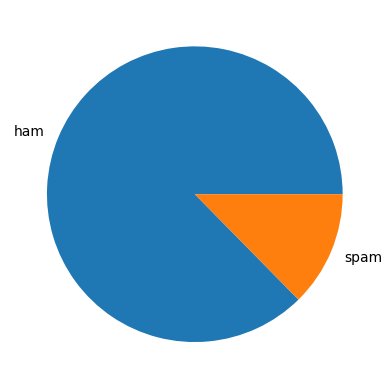

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'])
plt.show()


In [22]:

import nltk

In [23]:
!pip install nltk

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

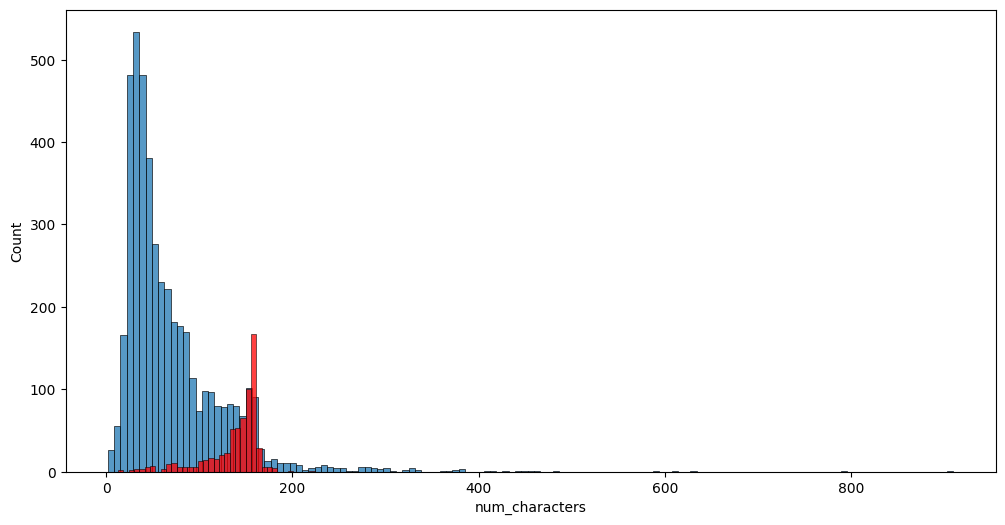

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

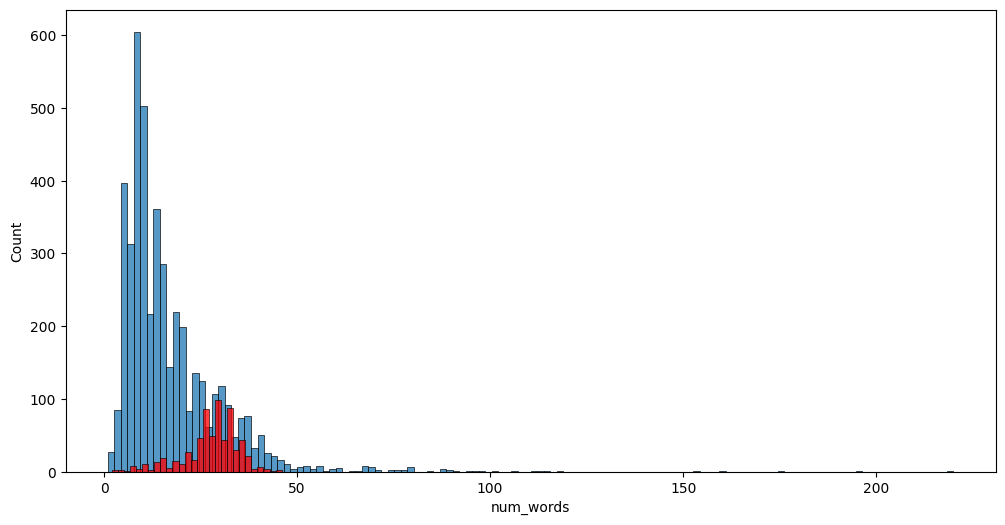

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

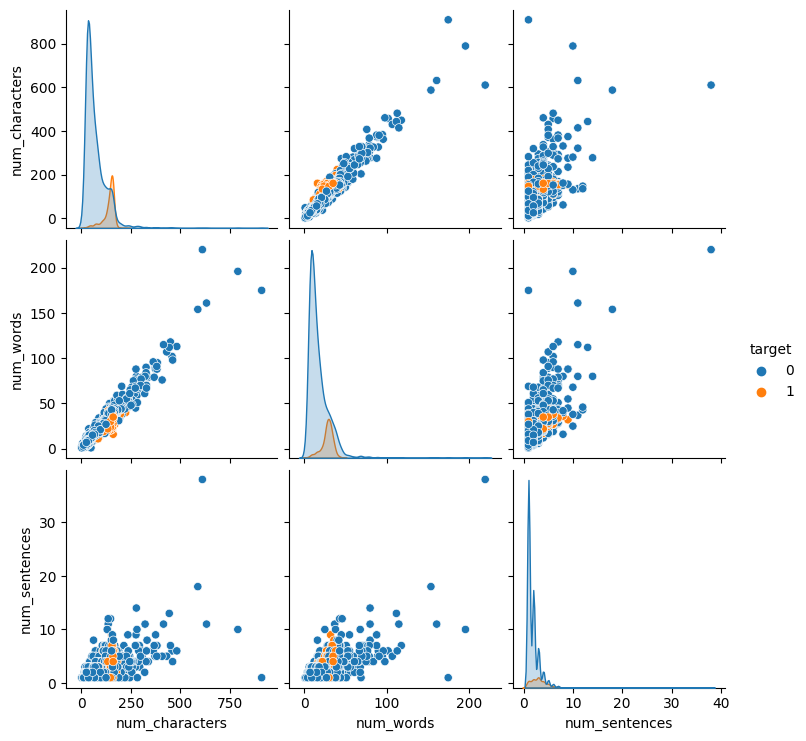

In [37]:

sns.pairplot(df,hue='target')

<ipython-input-38-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

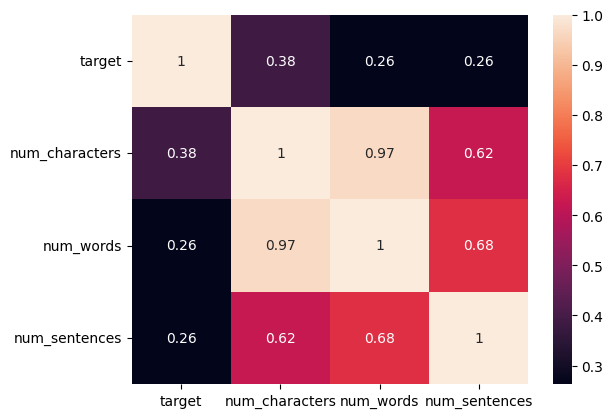

In [38]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**

-Lower case

-Tokenization

-Removing Special Characters

-Removing stop words and punctuation

-stemming

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')#downloading stopwords dataset

ps=PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)
trans_text=transform_text("I'm gonna home and i don't want to Talk roght now.I am Manvitha")
print(trans_text)

gon na home want talk roght manvitha


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('eating')

'eat'

In [42]:
df['trans_text']=df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=""))

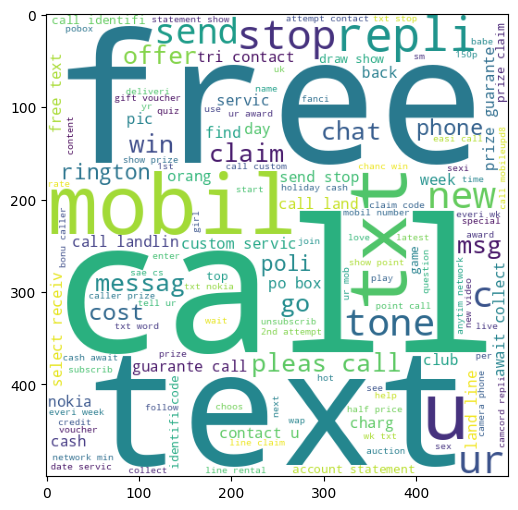

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc=wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=""))

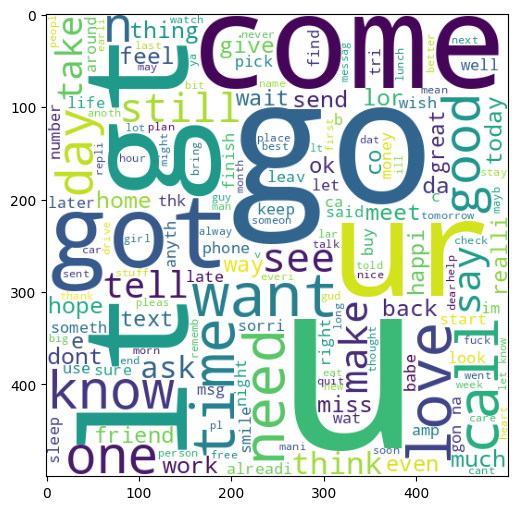

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
print(df.columns)
spam_corpus=[]
for eng in df[df['target']==1]['trans_text'].tolist():
  for word in eng.split():
    spam_corpus.append(word)
ham_corpus=[]
print(df.columns)
for msg in df[df['target']==0]['trans_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'trans_text'],
      dtype='object')
Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'trans_text'],
      dtype='object')


In [50]:
print(len(spam_corpus))
len(ham_corpus)

9939


35404

In [51]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


TypeError: ignored

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**BUILDING** **A** **MODEL**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [54]:
x = tfidf.fit_transform(df['trans_text']).toarray()


In [55]:
x.shape

(5169, 3000)

In [56]:
y=df['target'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [61]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [62]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [63]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


fdif------>mnb


In [64]:
!pip install xgboost

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [66]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [67]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gdbt,
    'XBG':xgb
}

In [68]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [69]:
train_classifier(svc, x_train, y_train, x_test, y_test)


(0.9758220502901354, 0.9747899159663865)

In [70]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print('For',name)
  print('Accuracy-',current_accuracy)
  print('precision -',current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For SVC
Accuracy- 0.9758220502901354
precision - 0.9747899159663865
For KN
Accuracy- 0.9052224371373307
precision - 1.0
For NB
Accuracy- 0.9709864603481625
precision - 1.0
For DT
Accuracy- 0.9274661508704062
precision - 0.8118811881188119
For LR
Accuracy- 0.9584139264990329
precision - 0.9702970297029703
For RF
Accuracy- 0.9758220502901354
precision - 0.9829059829059829
For AdaBoost
Accuracy- 0.960348162475822
precision - 0.9292035398230089
For Bgc
Accuracy- 0.9584139264990329
precision - 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
precision - 0.9745762711864406
For GBDT
Accuracy- 0.9468085106382979
precision - 0.9191919191919192
For XBG
Accuracy- 0.9671179883945842
precision - 0.9262295081967213


In [71]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,XBG,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [73]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [74]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,XBG,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


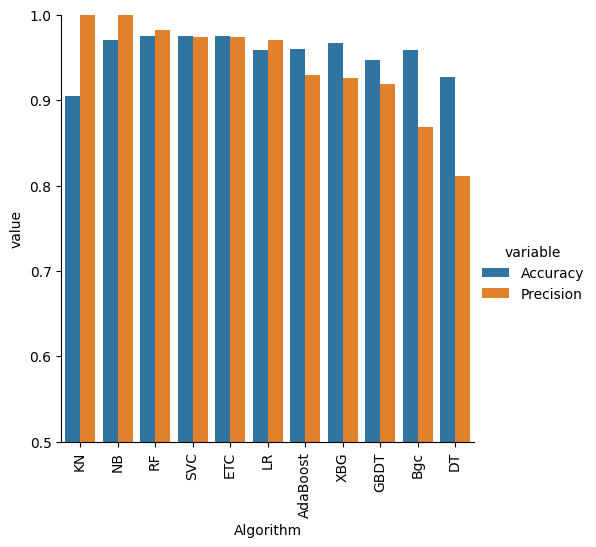

In [75]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
#model improve
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [77]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [78]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [79]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'precision_num_chars':precision_scores}).sort_values('precision_num_chars',ascending=False)

In [80]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,XBG,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [81]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=0.1,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [82]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [83]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=0.1, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [84]:
y_pred=voting.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))


Accuracy 0.9777562862669246
precision 0.9831932773109243


In [85]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()


In [86]:
from sklearn.ensemble import StackingClassifier

In [87]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)


In [89]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

x_train=['sample test 1','sample test 2','sample text 3']
y_train=[0,1,0]
tfidf=TfidfVectorizer(lowercase=True,stop_words='english')
x_train_tfdif=tfidf.fit_transform(x_train)
mnb=MultinomialNB()
mnb.fit(x_train_tfdif,y_train)
with open('vectorizer.pk1','wb') as vectorizer_file:
  pickle.dump(tfidf,vectorizer_file)
with open('model.pk1','wb') as model_file:
  pickle.dump(mnb,model_file)

In [ ]:
# clf.fit(x_train,y_train)
# y_pred=clf.predict(x_test)
# print('Accuracy',accuracy_score(y_test,y_pred))
# print('precision',precision_score(y_test,y_pred))